In [1]:
# import airfoil as af
import numpy as np
import os,sys
import matplotlib.pyplot as plt

from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from airLibs import airfoil as af
from airLibs import runF2w as f2w
from airLibs import plotting as aplt

In [2]:
for i in os.listdir():
    if i.startswith('naca'):
        airfile = i
airfoil = airfile[4:]

(-0.05, 1.05, -0.04401097495392642, 0.04401097495392642)

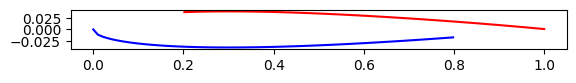

In [3]:
n_points = 100
pts = af.saveAirfoil(['s',airfile,airfoil,0,n_points])
x,y = pts.T
plt.plot(x[:n_points-20],y[:n_points-20],'r')
plt.plot(x[n_points:-20],y[n_points:-20],'b')

# plt.plot(x,y)
plt.axis("scaled")

In [4]:
Ncrit = 9
ftrip_low = {'pos':0.1,'neg':0.2} 
ftrip_up  = {'pos':0.1,'neg':0.2} 

angles = np.linspace(-6,15,43)
Reyn = 346153 #np.logspace(3,6,20)
MACH = 0.03

In [5]:
#f2w.deleteResults()

In [6]:
clcd = f2w.runFw2(Reyn,MACH,ftrip_low,ftrip_up,angles,airfile)

rm: cannot remove '4.00000/': Directory not empty
rm: cannot remove 'TMP.dir/': Directory not empty
rm: cannot remove '4.00000/': Directory not empty
rm: cannot remove 'TMP.dir/': Directory not empty
rm: cannot remove '4.00000/': Directory not empty
rm: cannot remove 'TMP.dir/': Directory not empty
rm: cannot remove '4.00000/': Directory not empty
rm: cannot remove 'TMP.dir/': Directory not empty
rm: cannot remove 'TMP.dir/': No such file or directory


In [7]:
clcd = f2w.makeCLCD(Reyn,MACH,angles)
a = clcd[:,0]
cl = clcd[:,1]
cd = -clcd[:,2]
cm = clcd[:,3]

OK


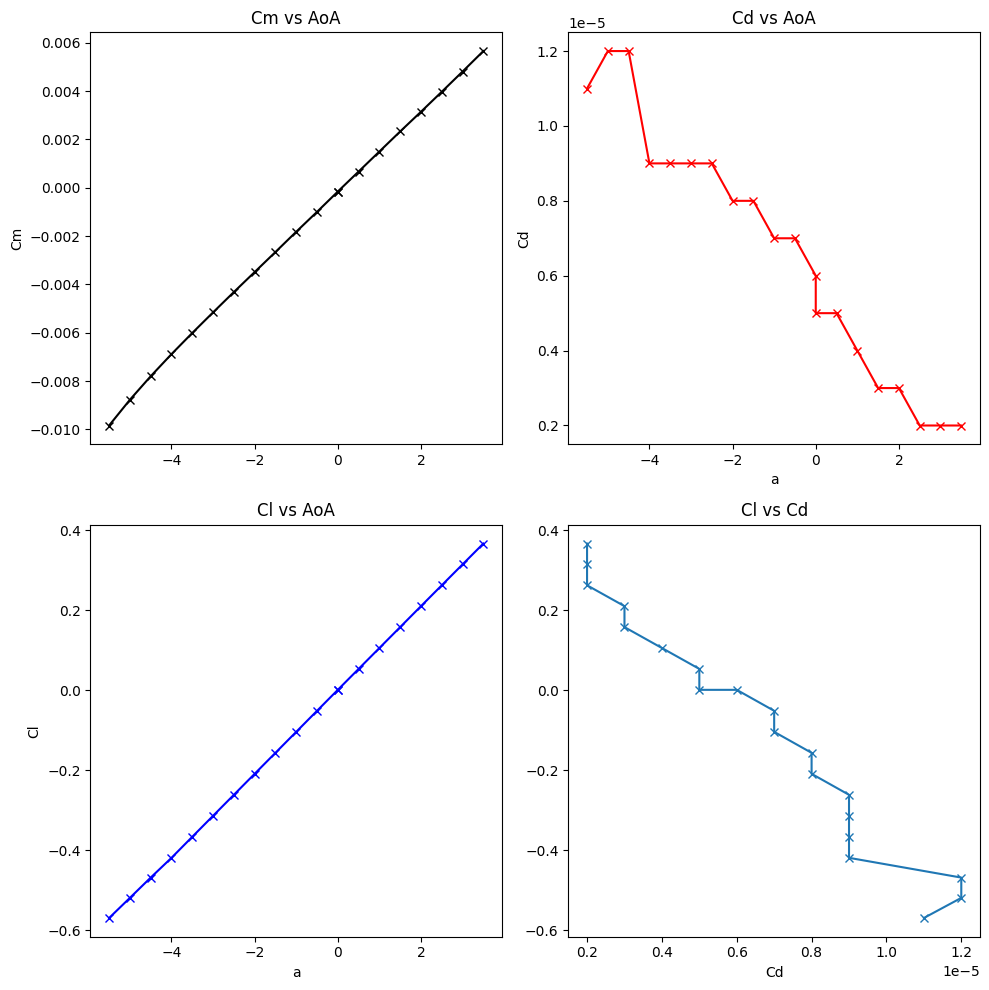

In [8]:
aplt.plotAeorCoeffs(a,cl,cd,cm)

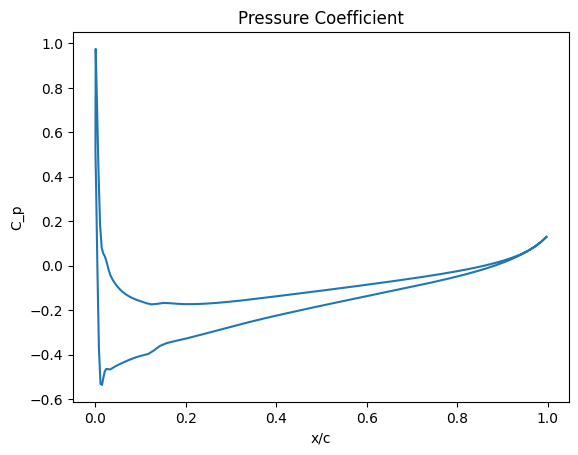

In [12]:
aplt.plotCP(1.)